<a href="https://colab.research.google.com/github/JGuarnizo/Coding_Dojo/blob/main/Machine_Learning/Week7_LogisticRegression/Metricas_Clasificacion_JG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métricas de clasificación
## Por : José Guarnizo
Tarea
Usaremos este conjunto de datos. Los datos, que fueron modificados a partir de esta fuente, contienen información sobre campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. El objetivo es predecir si el cliente se suscribirá (sí: 1 o no: 0) a un depósito a plazo (la columna de destino se llama 'y_yes' en este csv).

Tu tarea es construir un modelo de regresión logística para predecir si un cliente se suscribirá o no. Ajusta los hiperparámetros para obtener el mejor modelo posible. Luego, calcula las siguientes métricas de clasificación:

Métricas para calcular:

* Precisión
* Sensibilidad
* Especificidad
* AUC ROC
* Además, grafica la ROC.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score, plot_roc_curve


In [81]:
df=pd.read_csv("https://raw.githubusercontent.com/JGuarnizo/Coding_Dojo/main/Machine_Learning/Week7_LogisticRegression/bank_modified.csv")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [83]:
X=df.drop(columns=['y_yes'])
y=df['y_yes'].values

In [84]:
#División train_test_Split
X_train, X_test, y_train, y_test =train_test_split(X, y,random_state=0,stratify=y)
#Estandarización de variables X_train & X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#Modelo de Regresión Logística
reg = LogisticRegression(C=100)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

In [86]:
#Score de la base de test
reg.score(X_test, y_test)

0.8824049513704686

In [87]:
#Score de la base de entrenamiento
reg.score(X_train, y_train)

0.8932153392330383

In [88]:
#Precisión, Sensibilidad, Especificidad
cm = metrics.confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp = cm
precision = tp / (tp + fp)
sensitivity = tp/ (tp + fn)
specificity = tn / (tn + fp)
print('Sensibilidad: {:.3f}'.format(precision))
print('Sensibilidad: {:.3f}'.format(sensitivity))
print('Especificidad: {:.3f}'.format(specificity))

Sensibilidad: 0.465
Sensibilidad: 0.154
Especificidad: 0.977


In [89]:
print(f"TN:{tn}, FP:{fp}, FN:{fn}, TP:{tp}")

TN:978, FP:23, FN:110, TP:20


In [90]:
#Cálculo del AUC
print(f'Training AUC: {roc_auc_score(y_train, reg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, reg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8630097500530868
Testing AUC: 0.8421655267809114


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


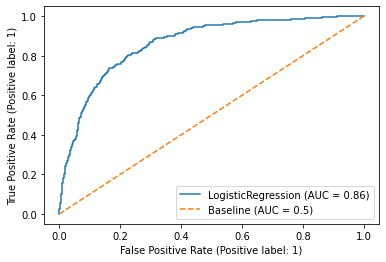

In [91]:
#Gráfico de la curva ROC
plot_roc_curve(reg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

##Preguntas para pensar y responder
Después de completar la tarea, responde las siguientes preguntas:



**¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué? Sugerencia: piensa en lo que significa cada métrica en este escenario específico.**

Para el modelo es buena el R2 o el AUC, mientras más cercanas a 1 mejor.

**¿Qué métrica va a ayudar más al banco?**

La Especificidad (0.977), el modelo es bueno para predecir clientes que no se van a suscribir.

**Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?**

No, evaluando la precisión con la base de entrenamiento y la de prueba, se tienen valores similares 0.88

**¿De qué otras formas podrías mejorar este modelo?**

Eliminando variables que no aporten mayor información al modelo